<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# ***Machine Learning Foundation***

# ***Dimensionality Reduction***

$ \ $

----

## ***Introduction***

We will be using customer data from a [Portuguese wholesale distributor](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for clustering. This data file is called $\color{lightgreen}{\text{Wholesale_Customers_Data}}$. It contains the following features:

* $\color{lightblue}{\text{Fresh}}$: annual spending on fresh products.

* $\color{lightblue}{\text{Milk}}$: annual spending on milk products.

* $\color{lightblue}{\text{Grocery}}$: annual spending on grocery products.

* $\color{lightblue}{\text{Frozen}}$: annual spending on frozen products.

* $\color{lightblue}{\text{Detergents_Paper}}$: annual spending on detergents and paper products.

* $\color{lightblue}{\text{Delicatessen}}$: annual spending on delicatessen products.

* $\color{lightblue}{\text{Channel}}$: customer channel
 * $1$: hotel/restaurant/cafe
 * $2$: retail

* $\color{lightblue}{\text{Region}}$: customer region
 * $1$: Lisbon
 * $2$: Porto
 * $3$: Other

In this data, the values for all spending are given in an arbitrary unit (m.u. = monetary unit).


$ \ $

-----

## ***Importing required libraries***

$ \ $

The following required modules are pre-installed in the Skills Network Labs environment.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Surpress numpy data type warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

$ \ $

----

## ***Example $(1)$***

$ \ $

$(1)$ Import the data and check the data types.

In [3]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/Wholesale_Customers_Data.csv'

data = pd.read_csv(url, sep = ',')

data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


$ \ $

$(2)$ Drop the channel and region columns as they won't be used since we focus on numeric columns for this example.

In [4]:
data = data.drop(['Channel', 'Region'], axis = 1)

data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


$ \ $

$(3)$ Convert the remaining columns to floats if necessary.

In [5]:
for col in data.columns:
    data[col] = data[col].astype(float)

In [6]:
data.dtypes

Fresh               float64
Milk                float64
Grocery             float64
Frozen              float64
Detergents_Paper    float64
Delicassen          float64
dtype: object

$ \ $

$(4)$  Copy this version of the data (using the `copy` method) to a variable to preserve it. We will be using it later.

In [7]:
data_orig = data.copy()

$ \ $

----

## ***Example $(2)$***

$ \ $

$(1)$ As with the previous lesson, we need to ensure the data is scaled and (relatively) normally distributed. Examine the correlation and skew.

In [8]:
# describimos la matriz de correlacion del dataframe ------> esta matriz es un datafram
corr_mat = data.corr()

# describimos el numero de renglones del dataframe de correlacion
n = corr_mat.shape[0]

# los elementos de la diagonal principal los volvemos cero
for x in range(n):
    corr_mat.iloc[x, x] = 0.0

# describimos el resultado obtenido
corr_mat

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,0.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,0.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,0.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,0.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,0.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,0.000000


$ \ $

$(2)$ We get the two categories with their respective most strongly correlated variable.

In [9]:
corr_mat.abs().idxmax()

Fresh                         Frozen
Milk                         Grocery
Grocery             Detergents_Paper
Frozen                    Delicassen
Detergents_Paper             Grocery
Delicassen                      Milk
dtype: object

$ \ $

$(3)$ Examine the skew values and $\color{yellow}{\text{log transform}}$. Looks like all of them need it.

In [10]:
# describimos los datos sesgados
skew = data.skew()

# organizamos los valores de mayor a menor
log_columns = skew.sort_values(ascending = False)

# mostramos los resultados en pantalla
log_columns

Delicassen          11.151586
Frozen               5.907986
Milk                 4.053755
Detergents_Paper     3.631851
Grocery              3.587429
Fresh                2.561323
dtype: float64

In [11]:
# recolectamos solo aquellos renglones con valor mayor a 0.75
log_columns = log_columns.loc[log_columns > 0.75]

# mostramos los resultados en pantalla
log_columns

Delicassen          11.151586
Frozen               5.907986
Milk                 4.053755
Detergents_Paper     3.631851
Grocery              3.587429
Fresh                2.561323
dtype: float64

In [12]:
# recordamos que e^(x) - 1 tiene inversa a izquierda log1p -----> log1p(x) = ln(1+x)
for col in log_columns.index:
    data[col] = np.log1p(data[col])

$ \ $

$(4)$ Scale the data again. Let's use `MinMaxScaler` this time just to mix things up.


In [13]:
# Se crea una instancia del modelo de escala MinMaxScaler.
mms = MinMaxScaler()

# realizamos una iteracion sobre las columnas de
for col in data.columns:

  # Se entrena el modelo de escala MinMaxScaler con los datos de la columna "col" y se obtiene un conjunto de datos transformados utilizando el método fit_transform().
  transform = mms.fit_transform(data[[col]])

  # Se asignan los datos transformados a la columna correspondiente en el conjunto de datos. El método squeeze() se utiliza para eliminar los ejes de longitud uno y asegurarse de que los datos tengan la forma correcta.
  data[col] = transform.squeeze()

$ \ $

$(5)$ Visualize the relationship between the variables.

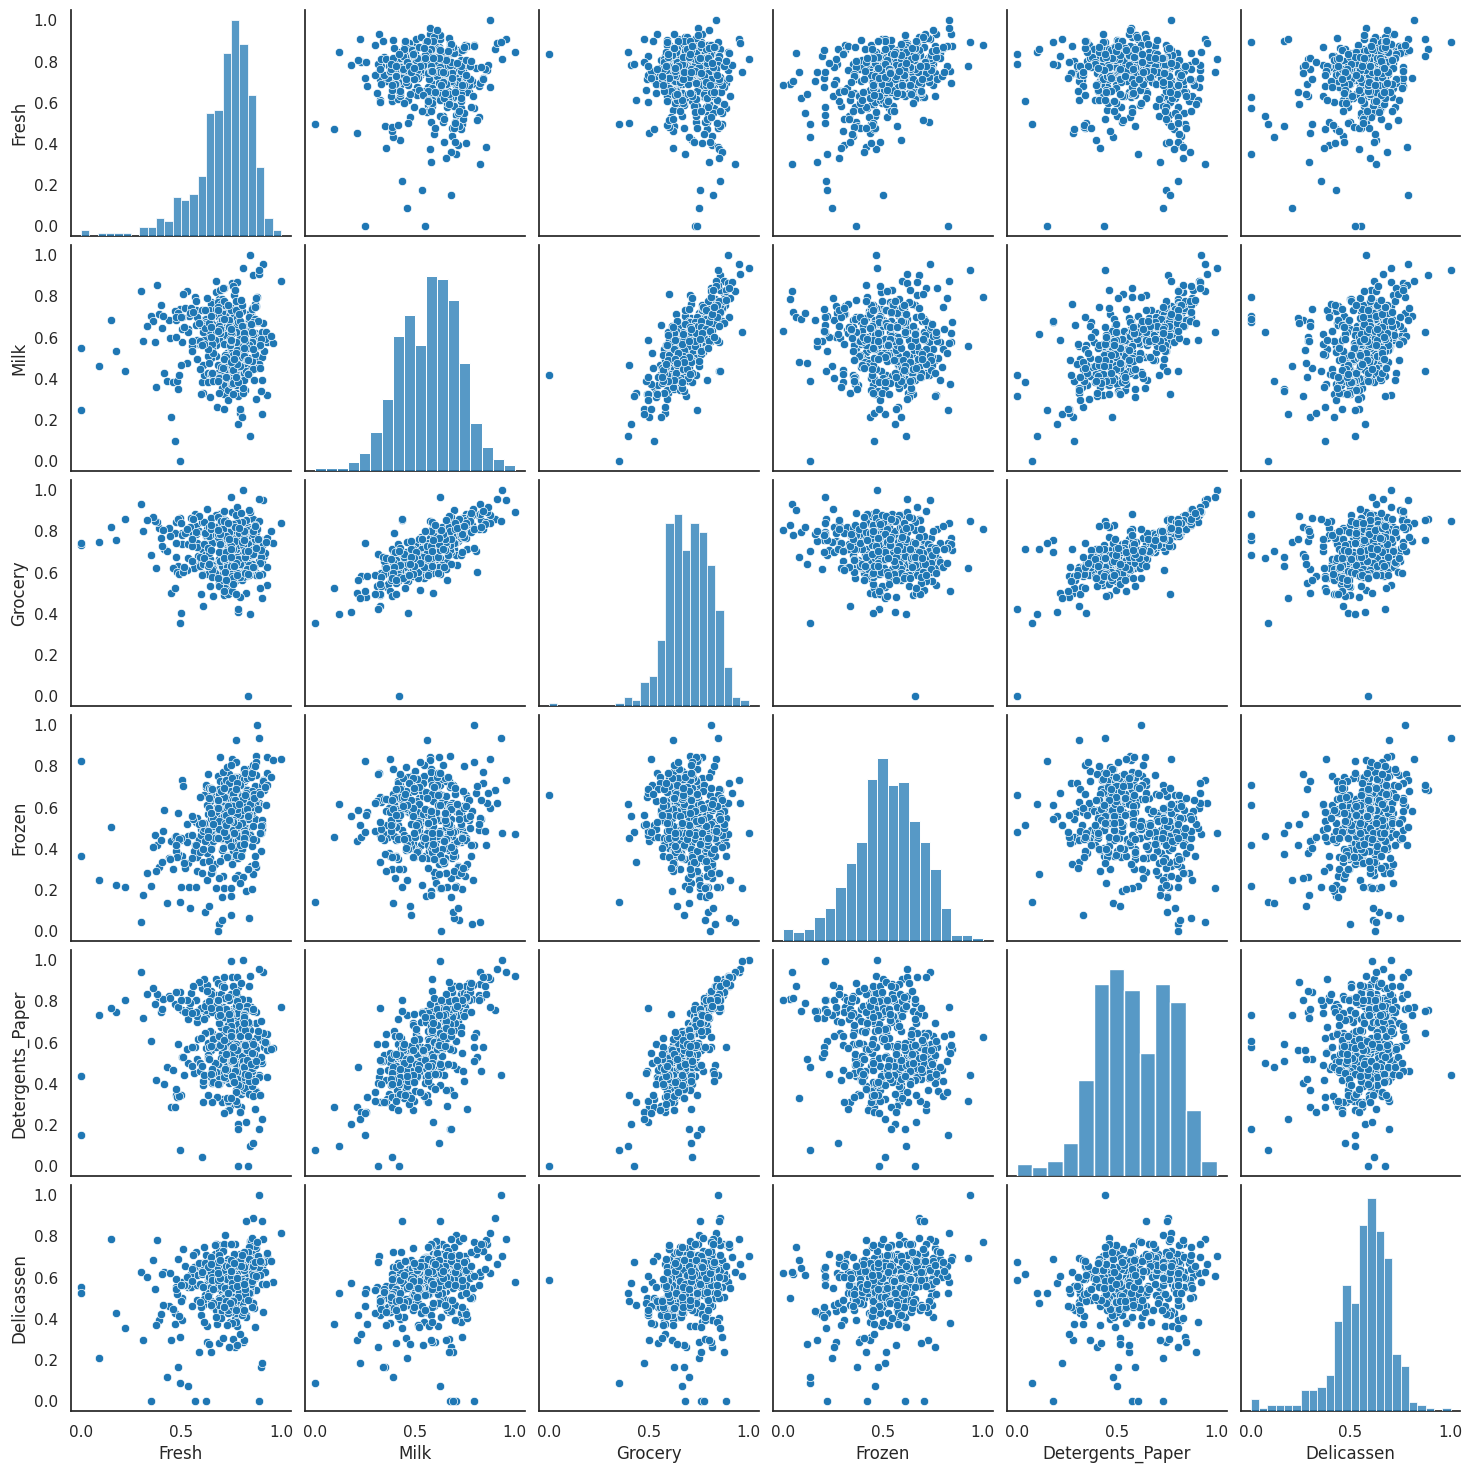

In [14]:
# Se establece el contexto de seaborn como 'notebook', lo cual ajusta los parámetros de estilo para una visualización adecuada en un entorno de cuaderno.
sns.set_context('notebook')

# Se establece el estilo de seaborn como 'white', lo cual crea un fondo blanco para los gráficos.
sns.set_style('white')

# Se muestra en pantalla un diagrama de dispersión que muestra la relación entre todas las variables del conjunto de datos. Cada variable se muestra en un eje y se muestran las correlaciones entre pares de variables.
sns.pairplot(data);

$ \ $

----

## ***Example $(3)$ - Pipeline***



$ \ $

$(1)$ Using Scikit-learn's [pipeline function](http://scikit-learn.org/stable/modules/pipeline.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01), recreate the data pre-processing scheme above (transformation and scaling) using a pipeline. If you used a non-Scikit learn function to transform the data (e.g. NumPy's log function), checkout  the custom transformer class called [FunctionTransformer](http://scikit-learn.org/stable/modules/preprocessing.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01#custom-transformers).



In [15]:
# Se crea una instancia de FunctionTransformer utilizando la función np.log1p como transformador. En este caso, np.log1p se utiliza para aplicar la transformación logarítmica natural más 1 a los datos.
log_transformer = FunctionTransformer(np.log1p)

# Se crea una lista llamada estimators que contiene los estimadores a utilizar en la tubería. En este caso, se incluye el estimador log1p creado anteriormente y el estimador MinMaxScaler, que se utiliza para realizar un escalado de características utilizando la técnica Min-Max.
estimators = [('log1p', log_transformer), ('minmaxscale', MinMaxScaler())]

# Se crea una tubería (pipeline) utilizando los estimadores de la lista estimators. La tubería permite encadenar varios pasos de transformación y estimación en un solo objeto, facilitando el procesamiento de los datos de manera secuencial.
pipeline = Pipeline(estimators)

$ \ $


$(2)$ Use the pipeline to transform the original data that was stored at the end of example $1$.

In [16]:
# aplica la tubería (pipeline) a los datos originales. Primero, se ajustan los estimadores de la tubería a los datos utilizando el método fit(), y luego se transforman los datos utilizando el método transform(). El resultado de pipeline.fit_transform(data_orig) se asigna a la variable data_pipe, que contendrá los datos transformados según los pasos definidos en la tubería.
data_pipe = pipeline.fit_transform(data_orig)

$ \ $

$(3)$ Compare the results to the original data to verify that everything worked.

In [17]:
# Esta línea de código utiliza la función np.allclose() de NumPy para verificar si todos los elementos de data_pipe y data son cercanos en términos de igualdad numérica. La función np.allclose() compara los elementos de dos matrices y devuelve True si todos los elementos son cercanos dentro de una tolerancia, y False en caso contrario.
np.allclose(data_pipe, data)

True

$ \ $

$\color{aquamarine}{\text{Remark:}}$ Scikit-learn has a more flexible $\color{lightblue}{\text{Pipeline}}$ function and a shortcut version called $\color{lightblue}{\text{make_pipeline}}$. Either can be used. Also, if different transformations need to be performed on the data, a [FeatureUnion](http://scikit-learn.org/stable/modules/pipeline.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01#featureunion-composite-feature-spaces) can be used.

$ \ $

----

## ***Example $(4)$***


$ \ $

$(1)$ Perform $PCA$ with ***n_components*** ranging from $1$ to $5$.

In [18]:
# creamos una lista vacia
pca_list = []

# creamos una lista vacia
feature_weight_list = []

# realizamos una iteracion sobre [1,2,3,4,5]
for n in range(1, 6):

    # Se crea un modelo de PCA (PCAmod) con el número de componentes especificado.
    PCAmod = PCA(n_components = n)

    # entrenamos nuestro modelo con la data anterior
    PCAmod.fit(data)

    # Se crea una serie que contiene el número de componentes (n), el modelo PCA (model) y la varianza explicada acumulada (var)
    serie = pd.Series({'n': n, 'model': PCAmod, 'var': PCAmod.explained_variance_ratio_.sum()})

    # pegamos la serie creada anteriormente a la lista pca_list
    pca_list.append(serie)

    # Se calculan los valores absolutos de los componentes principales (PCAmod.components_)
    abs_values = np.abs(PCAmod.components_)

    # sumamos los elementos de cada columna de abs_values
    abs_feature_values = abs_values.sum(axis = 0)

    # Se calcula el peso promedio de las características dividiendo los valores absolutos por la suma de todos los valores absolutos.
    promedio = abs_feature_values/abs_feature_values.sum()

    # creamos un dataframe
    frame = pd.DataFrame({'n' : n, 'features' : data.columns, 'values' : promedio})

    # pegamos el dataframe anterior en la lista feature_weight_list
    feature_weight_list.append(frame)

# concatenamos los elementos de pca_list por medio de columnas y luego calculamos la transpuesta
transpose = pd.concat(pca_list, axis = 1).T

# establecemos como indice el feature "n"
pca_df = transpose.set_index('n')

# mostramos los resultados en pantalla
pca_df

,model,var
n,,
1,PCA(n_components=1),0.448011
2,PCA(n_components=2),0.72099
3,PCA(n_components=3),0.827534
4,PCA(n_components=4),0.923045
5,PCA(n_components=5),0.979574


$ \ $

$(2)$ Create a table of feature importances for each data column.

In [19]:
# Usamos la función pd.concat() para concatenar los DataFrames almacenados en la lista feature_weight_list. Esto combina verticalmente los DataFrames en uno solo.
pd.concat(feature_weight_list).head()

,n,features,values
0,1,Fresh,0.060620
1,1,Milk,0.246010
2,1,Grocery,0.190236
3,1,Frozen,0.095979
4,1,Detergents_Paper,0.335487


In [20]:
# Se utiliza la función pd.concat() para concatenar los DataFrames almacenados en la lista feature_weight_list. Esto combina verticalmente los DataFrames en uno solo y se almacena en la variable feature.
feature = pd.concat(feature_weight_list)

# Se utiliza la función pivot para remodelar el DataFrame feature. Los valores de la columna 'n' se utilizan como índice, los valores de la columna 'features' se utilizan como columnas y los valores de la columna 'values' se utilizan como los valores del DataFrame resultante.
features_df = feature.pivot(index = 'n', columns = 'features', values = 'values')

# mostramos los resultados en pantalla
features_df

features,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
n,,,,,,
1,0.071668,0.335487,0.060620,0.095979,0.190236,0.246010
2,0.151237,0.177519,0.158168,0.222172,0.112032,0.178872
3,0.165518,0.145815,0.211434,0.268363,0.084903,0.123967
4,0.224259,0.149981,0.239527,0.214275,0.070971,0.100987
5,0.211840,0.182447,0.196382,0.178104,0.067338,0.163888


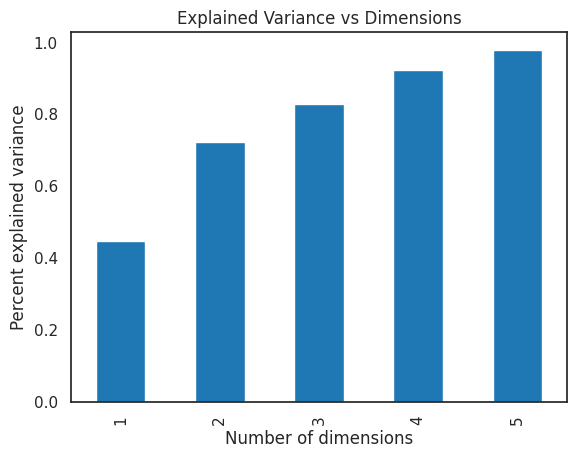

In [21]:
# Se utiliza el método plot() del DataFrame pca_df para crear un gráfico de barras de los datos de la columna "var". El argumento kind='bar' especifica que se desea un gráfico de barras.
ax = pca_df['var'].plot(kind = 'bar')

# Se utiliza el método set() del objeto ax para establecer las etiquetas de los ejes x e y y el título del gráfico. Esto añade etiquetas descriptivas al gráfico.
ax.set(xlabel = 'Number of dimensions', ylabel = 'Percent explained variance', title = 'Explained Variance vs Dimensions');

$ \ $

$(3)$ We create the plot of feature importances.

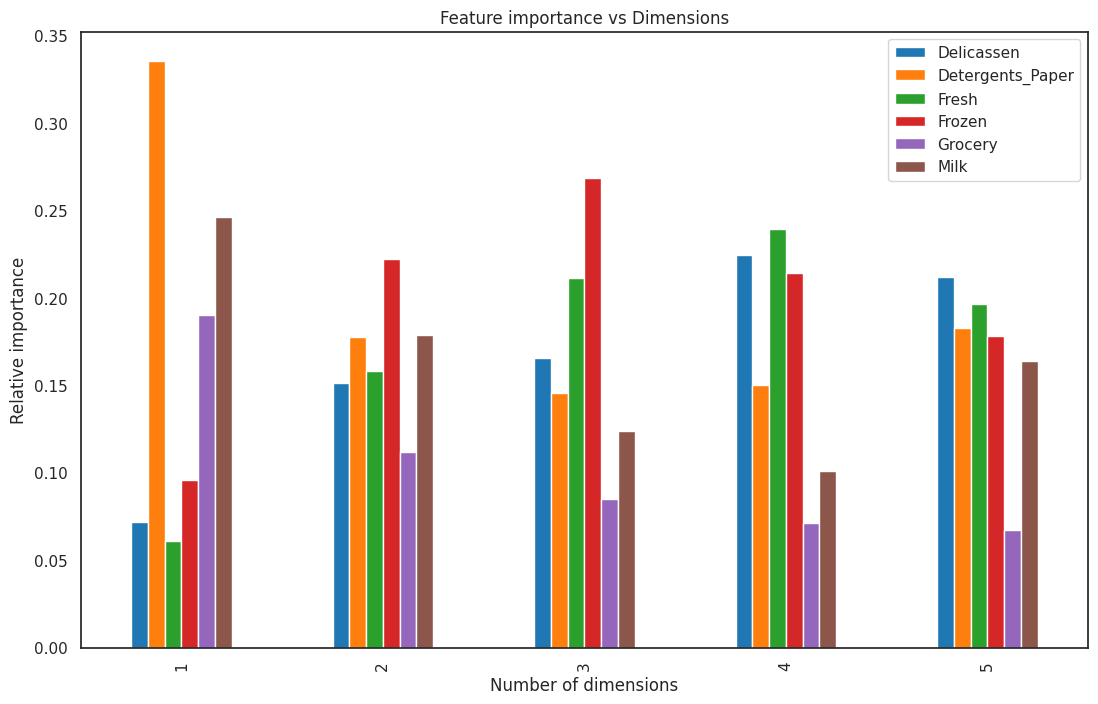

In [22]:
# creamos el plot de los rasgos de importancia
ax = features_df.plot(kind ='bar', figsize = (13,8))

# describimos la leyenda del plot
ax.legend(loc = 'upper right')

# establecemos las etiquetas de los ejes y el titulo de la imagen
ax.set(xlabel='Number of dimensions', ylabel = 'Relative importance', title = 'Feature importance vs Dimensions');

$ \ $

----

## ***Example $(5)$***


$ \ $


$(1)$ Create a `KernelPCA` model with:

*  kernel = 'rbf'.

* fit_inverse_transform = True




In [23]:
# Esta linea crea un objeto KernelPCA con el kernel RBF. El kernel RBF es una función de base radial utilizada para mapear los datos a un espacio de características de mayor dimensión. El parámetro fit_inverse_transform se establece en True, lo que permite ajustar un transformador inverso que puede reconstruir los datos originales a partir de las componentes principales.
kernel = KernelPCA(kernel = 'rbf', fit_inverse_transform = True)

$ \ $


$(2)$  Use `GridSearchCV` to tune the parameters of the `KernelPCA` model.



In [24]:
# describimos los parámetros de búsqueda de la cuadrícula
param_grid = {'gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0], 'n_components': [2, 3, 4]}

In [25]:
# En este código se define una función llamada "scorer" que evalúa el desempeño de un modelo PCA al calcular el error cuadrático medio (MSE) entre los datos originales y los datos reconstruidos después de aplicar la transformación PCA.
def scorer(pcamodel, X, y = None):

    # Se verifica si los datos X son un DataFrame (X.values) y se almacenan en X_val.
    try:
        X_val = X.values
    except:
        X_val = X

    # entrenamos nuestro modelo pca con la data X_val
    pcamodel.fit(X_val)

    # realizamos una transformacion del modelo entrenado pca.............  X ------> X'
    data_inv = pcamodel.transform(X_val)

    # realizamos una transformacion del modelo entrenado pca.............  X' ------> (X')^(-1)
    data_inv = pcamodel.inverse_transform(data_inv)

    # Se utilizan la funcion ravel() para aplanar los datos originales X_val y los datos reconstruidos data_inv.
    x = data_inv.ravel()
    y = X_val.ravel()
    mse = mean_squared_error(x, y)

    # Finalmente, se devuelve el valor del MSE negativo, ya que los valores más grandes son mejores en términos de puntuación
    return -1 * mse

In [26]:
# Se crea una instancia de GridSearchCV para realizar una búsqueda de cuadrícula. Se utiliza el modelo kernel (en este caso, se asume que kernel es un objeto ya creado previamente) y se especifican los parámetros a explorar en param_grid. El parámetro scoring se establece como la función scorer definida anteriormente para evaluar el desempeño del modelo. El parámetro n_jobs se establece en -1 para utilizar todos los núcleos disponibles del procesador.
kernelPCA = GridSearchCV(kernel, param_grid = param_grid, scoring = scorer, n_jobs = -1)

# Se ajusta el modelo kernelPCA utilizando los datos data. Durante este proceso, se realizará la búsqueda de cuadrícula para encontrar los mejores parámetros.
kernelPCA.fit(data)

# Se devuelve el mejor estimador encontrado durante la búsqueda de cuadrícula. Este estimador corresponde al modelo con los mejores parámetros que optimizan la puntuación especificada en la función scorer.
kernelPCA.best_estimator_

KernelPCA(fit_inverse_transform=True, gamma=1.0, kernel='rbf', n_components=4)

$ \ $

----

## ***Example $(6)$***


$ \ $

$(1)$ Load the dataset.

In [27]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/Human_Activity_Recognition_Using_Smartphones_Data.csv'

data = pd.read_csv(url, sep = ',')

In [28]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


$ \ $

$(2)$ Load the Human Activity data from the datasets.

In [29]:
# Describimos la data predictiva
X = data.drop('Activity', axis = 1)

# Describimos la data objetivo
y = data["Activity"]

$ \ $

$(3)$ Write a function that takes in a value of $n$ and makes the above pipeline, then predicts the "Activity" column over a $5$-fold StratifiedShuffleSplit, and returns the average test accuracy.

In [30]:
# Esto crea un objeto StratifiedShuffleSplit que se utiliza para generar índices de división estratificados y aleatorios en conjuntos de datos. El parámetro n_splits especifica el número de iteraciones de división a generar y random_state establece la semilla del generador de números aleatorios para obtener resultados reproducibles.
sss = StratifiedShuffleSplit(n_splits = 5, random_state = 42)

In [31]:
# En este código se define una función llamada get_avg_score que calcula el promedio de precisión de un modelo Pipeline que combina un escalador (StandardScaler), una reducción de dimensionalidad (PCA) y un estimador (LogisticRegression) utilizando la validación cruzada estratificada.
def get_avg_score(n):

    # Se construyen los parámetros del Pipeline especificando los pasos (StandardScaler, PCA, LogisticRegression)
    parametros = [('scaler', StandardScaler()),  ('pca', PCA(n_components = n)), ('estimator', LogisticRegression(solver = 'liblinear')) ]

    # Se crea el Pipeline utilizando los parámetros especificados.
    pipe = Pipeline(parametros)

    # Se crea una lista vacía scores para almacenar los puntajes de precisión.
    scores = []

    # Se realiza un bucle for sobre las divisiones generadas por la estratificación aleatoria utilizando sss.split(X, y).
    for train_index, test_index in sss.split(X, y):

      # Se crean los conjuntos de entrenamiento y prueba para X utilizando los índices generados por la estratificación.
      X_train, X_test = X.loc[train_index], X.loc[test_index]

      # Se crean los conjuntos de entrenamiento y prueba para y utilizando los índices generados por la estratificación.
      y_train, y_test = y.loc[train_index], y.loc[test_index]

      # entrenamos la tuberia con la data de entrenamiento X_train, y_train
      pipe.fit(X_train, y_train)

      # Se realizan predicciones en los datos de prueba X_test utilizando el modelo entrenado del Pipeline.
      y_pred = pipe.predict(X_test)

      # describimos la precision de nuestro modelo
      precision = accuracy_score(y_test, y_pred)

      # pegamos en nuestra lista la precision encontrada
      scores.append(precision)

    # la funcion devuelve el promedio de la lista scores
    return np.mean(scores)

$ \ $

$(4)$ For various values of n, call the above function and store the average accuracies.

In [32]:
# describimos una lista de numeros naturales
N = [10, 20, 50, 100, 150, 200, 300, 400]

# describimos el rango de la funcion creada anteriormente sobre la lista de numeros naturales anterior
score_list = [get_avg_score(n) for n in N]

$ \ $

$(5)$ Plot the average accuracy by number of dimensions.

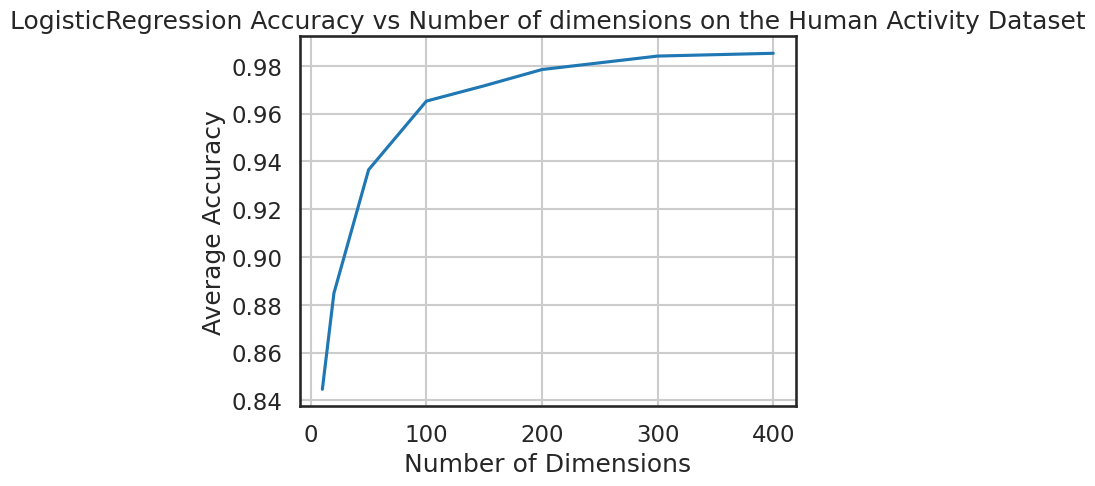

In [33]:
# establecemos el contexto
sns.set_context('talk')

# describimos los ejes del plot
ax = plt.axes()

# describimos un plot de la grafica de la funcion creada anteriormente sobre la lista ------> luego pegamos estos puntos con segmentos de recta
ax.plot(N, score_list)

#  establecemos las etiquetas de los ejes y el titulo del plot
ax.set(xlabel = 'Number of Dimensions', ylabel = 'Average Accuracy', title = 'LogisticRegression Accuracy vs Number of dimensions on the Human Activity Dataset')

# mostramos una cuadricula para el plot
ax.grid(True)

# mostramos el plot en pantalla
plt.show()